In [85]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pathlib import Path 
import plotly.express as px
import seaborn as sns

In [86]:
# Load the CSV file
Walmart_Sales_csv = Path("Walmart_Sales.csv")
Walmart_Sales_csv = pd.read_csv("Walmart_Sales.csv")
Walmart_Sales_csv.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [87]:
# Show Dataset Structure
Walmart_Sales_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [88]:
#check for missing values
Walmart_Sales_csv.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [89]:
# Summary Statistics
Walmart_Sales_csv.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [90]:
Walmart_Sales_csv.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [91]:
# check for duplicates
Walmart_Sales_csv.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [92]:
# check the Holiday_Flag colums 
print(Walmart_Sales_csv['Holiday_Flag'].value_counts())

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64


Visalization

In [93]:
# Define custom colors for holiday flag
custom_colors = ['#FF5733', '#33FF57']  
# Create a pie chart for Holiday_Flag with custom colors
fig = px.pie(
    Walmart_Sales_csv,
    names='Holiday_Flag', # column that contain holiday status (1 for holiday 0 for no holiday)
    title='Holiday VS No Holiday',
    color_discrete_sequence=custom_colors) 

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the pie chart
fig.show()


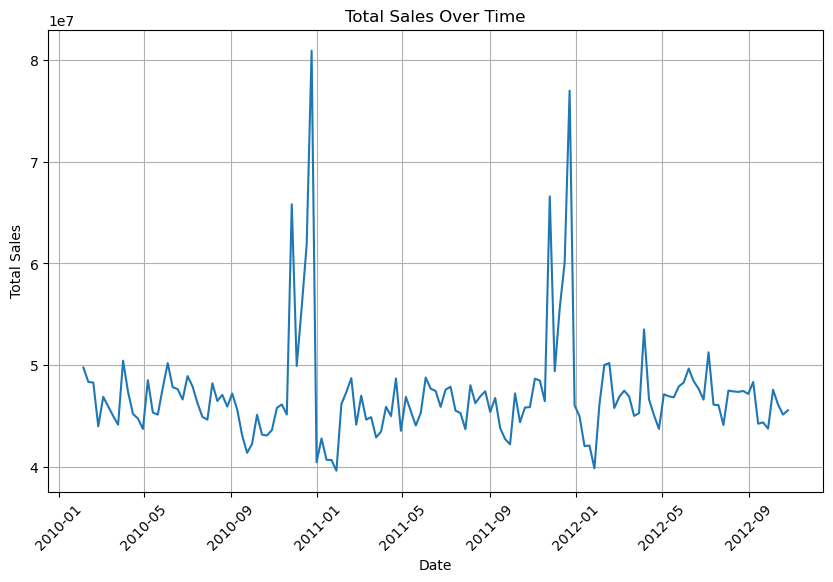

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Walmart_Sales.csv')

# Convert 'Date' to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Group by date and sum sales
daily_sales = data.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


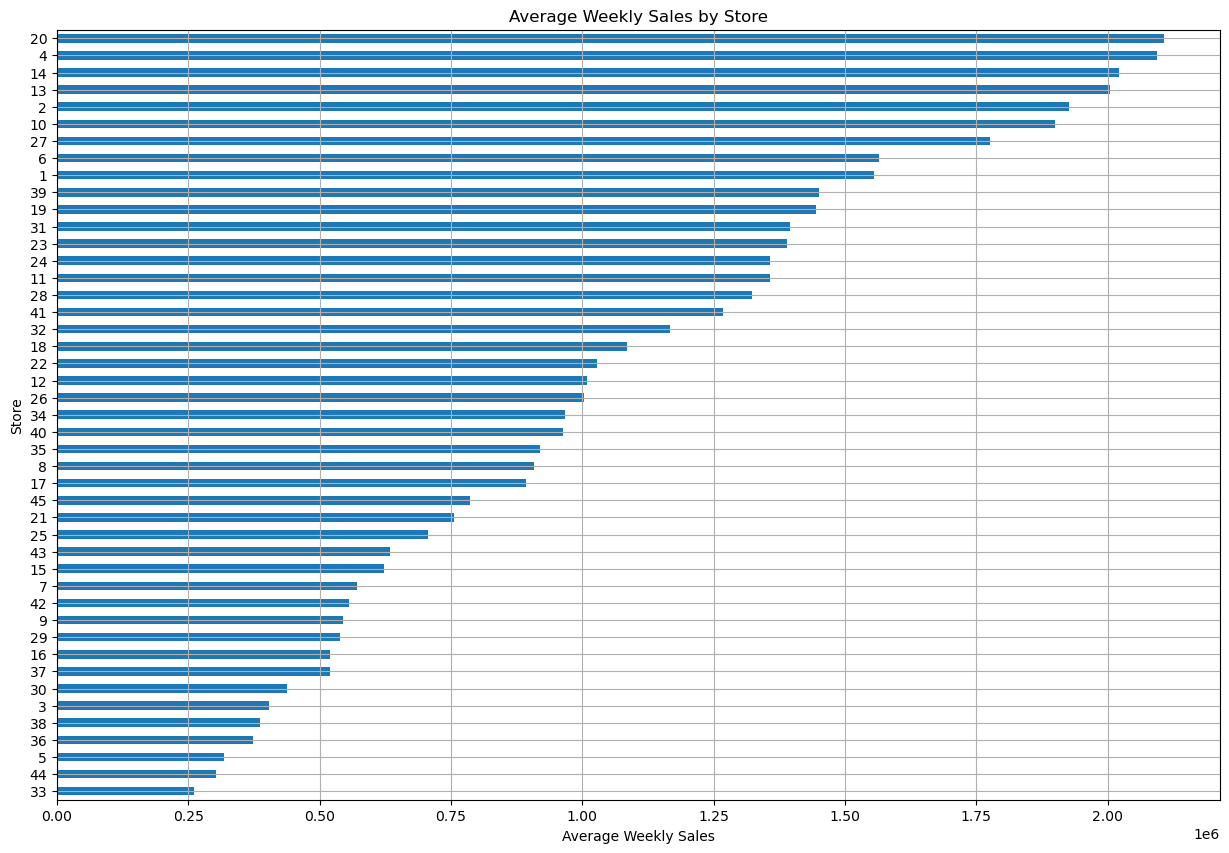

In [95]:
# Group by store and calculate average sales
store_sales = data.groupby('Store')['Weekly_Sales'].mean().sort_values()

# Plotting
plt.figure(figsize=(15, 10))
store_sales.plot(kind='barh')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Store')
plt.grid()
plt.show()



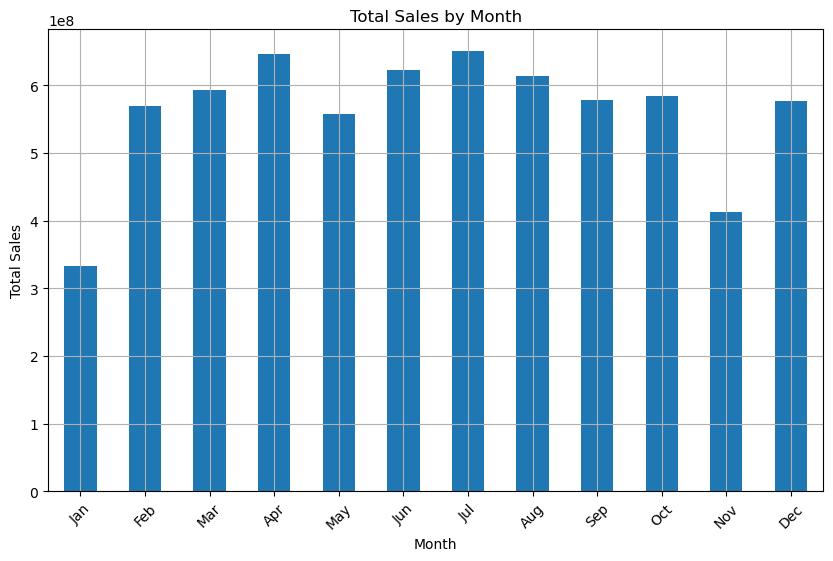

In [96]:
# Extract month from the date
data['Month'] = data['Date'].dt.month

# Group by month and sum sales
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid()
plt.show()


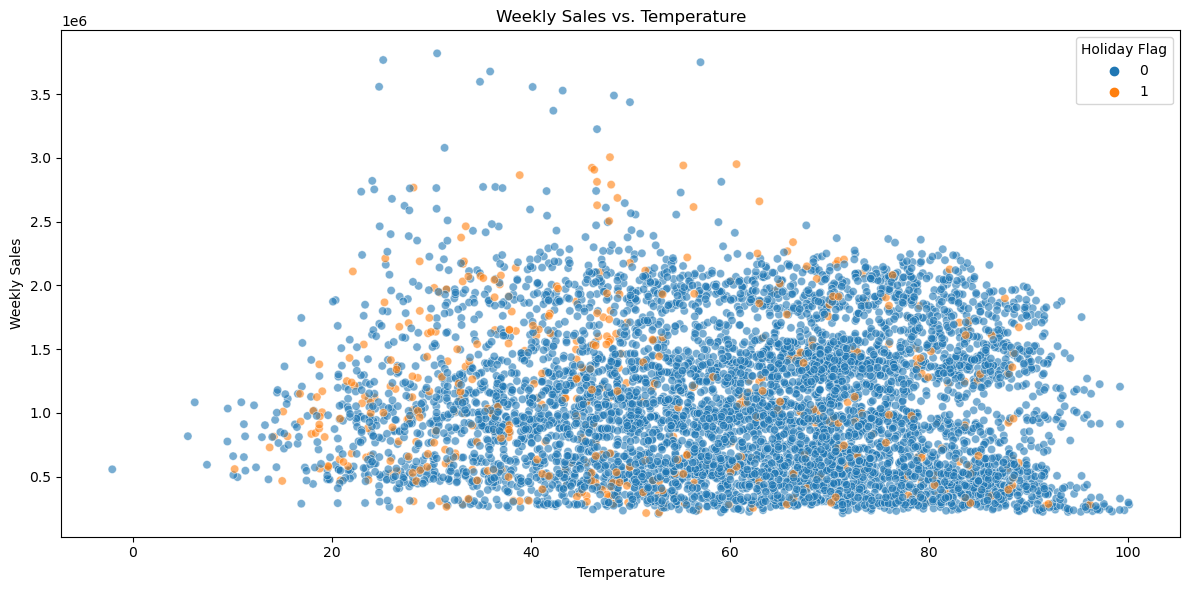

In [97]:
# Visualization 3: Weekly Sales vs. Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Holiday_Flag', alpha=0.6)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday Flag', loc='upper right')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



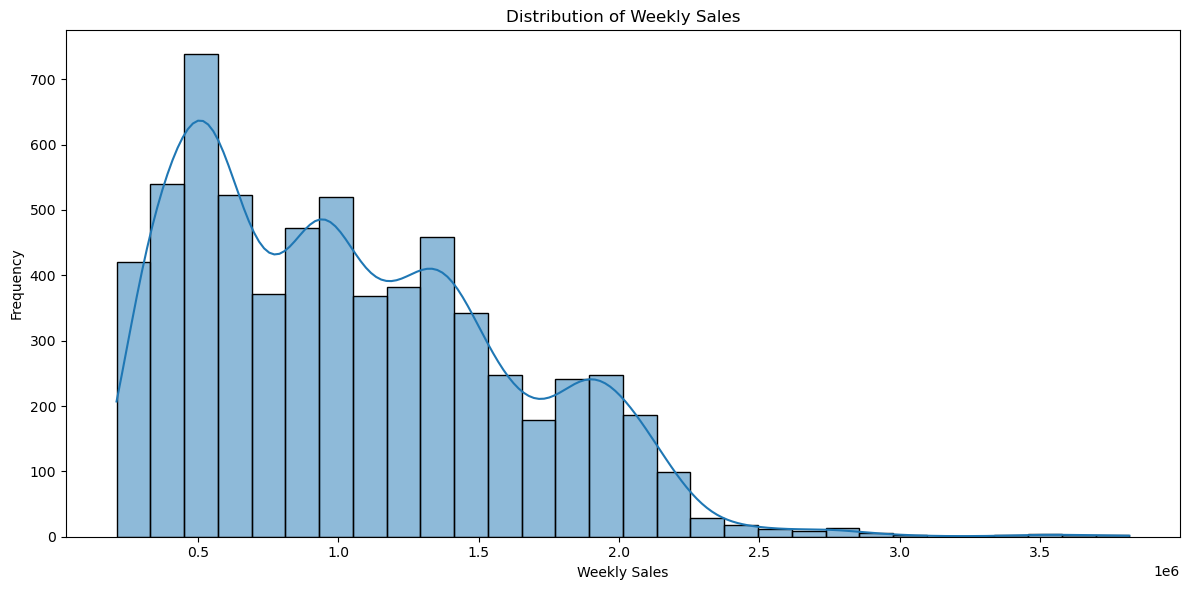

In [98]:
# Visualization 4: Weekly Sales Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
